# CIS 519 HW 2

In [5]:
import pandas as pd

import numpy as np
from numpy import linalg as LA
from numpy.linalg import *

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Linear Regression

In [10]:
'''
    Linear Regression via Gradient Descent
'''

class LinearRegression:

    def __init__(self, init_theta=None, alpha=0.01, n_iter=100):
        '''
        Constructor
        '''
        self.alpha = alpha
        self.n_iter = n_iter
        self.theta = init_theta
        self.JHist = None
    

    def gradientDescent(self, X, y, theta):
        '''
        Fits the model via gradient descent
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-dimensional numpy vector
            theta is a d-dimensional numpy vector
        Returns:
            the final theta found by gradient descent
        '''
        n,d = X.shape
        self.JHist = []
        for i in range(self.n_iter):
            self.JHist.append( (self.computeCost(X, y, theta), theta) )
            print("Iteration: ", i+1, " Cost: ", self.JHist[i][0], " Theta.T: ", theta.T)
            yhat = X*theta
            theta = theta -  (X.T * (yhat - y)) * (self.alpha / n)
        return theta
    

    def computeCost(self, X, y, theta):
        '''
        Computes the objective function
        Arguments:
          X is a n-by-d numpy matrix
          y is an n-dimensional numpy vector
          theta is a d-dimensional numpy vector
        Returns:
          a scalar value of the cost  
              ** Not returning a matrix with just one value! **
        '''
        n,d = X.shape
        yhat = X*theta
        J =  (yhat-y).T * (yhat-y) / n
        J_scalar = J.tolist()[0][0]  # convert matrix to scalar
        return J_scalar
    

    def fit(self, X, y):
        '''
        Trains the model
        Arguments:
            X is a n-by-d Pandas Dataframe
            y is an n-dimensional Pandas Series
        '''
        n = len(y)
        X = X.to_numpy()
        X = np.c_[np.ones((n,1)), X]     # Add a row of ones for the bias term

        y = y.to_numpy()
        n,d = X.shape
        y = y.reshape(n,1)

        if self.theta is None:
            self.theta = np.matrix(np.zeros((d,1)))

        self.theta = self.gradientDescent(X,y,self.theta)   


    def predict(self, X):
        '''
        Used the model to predict values for each instance in X
        Arguments:
            X is a n-by-d Pandas DataFrame
        Returns:
            an n-dimensional numpy vector of the predictions
        '''
        X = X.to_numpy()
        X = np.c_[np.ones((n,1)), X]     # Add a row of ones for the bias term
        return pd.DataFrame(X*self.theta)

### Test code for linear regression

In [40]:
def test_linreg(n_iter = 2000):
  # load the data
  filepath = "http://www.seas.upenn.edu/~cis519/spring2020/data/hw2-multivariateData.csv"
  df = pd.read_csv(filepath, header=None)

  X = df[df.columns[:-1]]
  y = df[df.columns[-1]]

  n,d = X.shape

  # # Standardize features
  from sklearn.preprocessing import StandardScaler
  standardizer = StandardScaler()
  X = pd.DataFrame(standardizer.fit_transform(X))  # compute mean and stdev on training set for standardization

  # # initialize the model
  init_theta = np.matrix(np.random.randn((d+1))).T
  alpha = 0.01

  # # Train the model
  lr_model = LinearRegression(init_theta = init_theta, alpha = alpha, n_iter = n_iter)
  lr_model.fit(X,y)

  # # Compute the closed form solution
  X = np.asmatrix(X.to_numpy())
  X = np.c_[np.ones((n,1)), X]     # Add a row of ones for the bias term
  y = np.asmatrix(y.to_numpy())
  n,d = X.shape
  y = y.reshape(n,1)
  thetaClosedForm = inv(X.T*X)*X.T*y
  print("thetaClosedForm: ", thetaClosedForm.T)

# Run the Linear Regression Test

In [12]:
test_linreg(2000)

Iteration:  1  Cost:  131183851530.50764  Theta.T:  [[-0.90958082  0.31195318 -1.84645875]]
Iteration:  2  Cost:  128596288842.23882  Theta.T:  [[3403.22611073 1057.96050814  545.25847656]]
Iteration:  3  Cost:  126062754444.15883  Theta.T:  [[6773.32044537 2101.96896934 1080.96987748]]
Iteration:  4  Cost:  123582088262.9  Theta.T:  [[10109.71383666  3132.53753777  1605.47805939]]
Iteration:  5  Cost:  121153155995.34953  Theta.T:  [[13412.74329403  4149.86334672  2118.97031348]]
Iteration:  6  Cost:  118774848512.2165  Theta.T:  [[16682.74245684  5154.14050936  2621.63095413]]
Iteration:  7  Cost:  116446081276.0603  Theta.T:  [[19920.04162802  6145.56016563  3113.64136563]]
Iteration:  8  Cost:  114165793773.41228  Theta.T:  [[23124.96780748  7124.31052839  3595.18004809]]
Iteration:  9  Cost:  111932948960.63264  Theta.T:  [[26297.84472515  8090.57692883  4066.42266267]]
Iteration:  10  Cost:  109746532723.1538  Theta.T:  [[29438.99287364  9044.54186117  4527.54207616]]
Iteration: 

Iteration:  205  Cost:  6509428206.977944  Theta.T:  [[296601.31711263  83772.43588283  14934.7400035 ]]
Iteration:  206  Cost:  6466511028.878903  Theta.T:  [[297039.43053725  83908.72321285  14863.38265381]]
Iteration:  207  Cost:  6424404693.07779  Theta.T:  [[297473.16282763  84044.04724734  14791.97571326]]
Iteration:  208  Cost:  6383093340.696253  Theta.T:  [[297902.55779509  84178.41789692  14720.5250719 ]]
Iteration:  209  Cost:  6342561429.190843  Theta.T:  [[298327.65881289  84311.84494017  14649.03650539]]
Iteration:  210  Cost:  6302793725.953139  Theta.T:  [[298748.5088205   84444.33802552  14577.51567686]]
Iteration:  211  Cost:  6263775302.041203  Theta.T:  [[299165.15032804  84575.90667319  14505.96813878]]
Iteration:  212  Cost:  6225491526.039616  Theta.T:  [[299577.62542051  84706.56027714  14434.39933481]]
Iteration:  213  Cost:  6187928058.045407  Theta.T:  [[299985.97576205  84836.30810688  14362.81460155]]
Iteration:  214  Cost:  6151070843.777243  Theta.T:  [[3

Iteration:  515  Cost:  4122154230.124104  Theta.T:  [[338469.55181427 103419.09226023   -581.46127075]]
Iteration:  516  Cost:  4121799669.6024885  Theta.T:  [[338488.98289187 103445.79866498   -607.67144016]]
Iteration:  517  Cost:  4121449058.5353184  Theta.T:  [[338508.2196587  103472.38477403   -633.76905499]]
Iteration:  518  Cost:  4121102345.5997887  Theta.T:  [[338527.26405785 103498.85116008   -659.75456716]]
Iteration:  519  Cost:  4120759480.255129  Theta.T:  [[338546.11801302 103525.19839261   -685.62842729]]
Iteration:  520  Cost:  4120420412.72913  Theta.T:  [[338564.78342863 103551.42703795   -711.39108469]]
Iteration:  521  Cost:  4120085094.004932  Theta.T:  [[338583.26219009 103577.53765926   -737.04298732]]
Iteration:  522  Cost:  4119753475.808054  Theta.T:  [[338601.55616394 103603.53081661   -762.58458184]]
Iteration:  523  Cost:  4119425510.5936513  Theta.T:  [[338619.66719804 103629.40706694   -788.01631357]]
Iteration:  524  Cost:  4119101151.5340347  Theta.T:

Iteration:  834  Cost:  4088474990.209456  Theta.T:  [[340333.93252725 107975.00448842  -5105.7739108 ]]
Iteration:  835  Cost:  4088458106.0940604  Theta.T:  [[340334.71979772 107981.48643789  -5112.25256815]]
Iteration:  836  Cost:  4088441371.614428  Theta.T:  [[340335.49919549 107987.93984622  -5118.70273572]]
Iteration:  837  Cost:  4088424785.429268  Theta.T:  [[340336.27079928 107994.3648393   -5125.12453858]]
Iteration:  838  Cost:  4088408346.209618  Theta.T:  [[340337.03468703 108000.76154243  -5131.51810127]]
Iteration:  839  Cost:  4088392052.6387134  Theta.T:  [[340337.79093591 108007.13008039  -5137.88354777]]
Iteration:  840  Cost:  4088375903.411877  Theta.T:  [[340338.53962229 108013.47057737  -5144.22100153]]
Iteration:  841  Cost:  4088359897.2363977  Theta.T:  [[340339.28082181 108019.78315706  -5150.53058546]]
Iteration:  842  Cost:  4088344032.8314195  Theta.T:  [[340340.01460934 108026.06794254  -5156.81242192]]
Iteration:  843  Cost:  4088328308.927824  Theta.T:

Iteration:  1169  Cost:  4086659537.954218  Theta.T:  [[340409.9436721  109111.67168901  -6242.2311622 ]]
Iteration:  1170  Cost:  4086658664.6889777  Theta.T:  [[340409.97083113 109113.15075438  -6243.71021058]]
Iteration:  1171  Cost:  4086657799.0937676  Theta.T:  [[340409.99771856 109114.62331127  -6245.18275076]]
Iteration:  1172  Cost:  4086656941.101202  Theta.T:  [[340410.02433712 109116.08938834  -6246.64881138]]
Iteration:  1173  Cost:  4086656090.64449  Theta.T:  [[340410.05068949 109117.5490141   -6248.10842093]]
Iteration:  1174  Cost:  4086655247.6574225  Theta.T:  [[340410.07677834 109119.00221694  -6249.56160782]]
Iteration:  1175  Cost:  4086654412.0743785  Theta.T:  [[340410.10260631 109120.44902512  -6251.0084003 ]]
Iteration:  1176  Cost:  4086653583.8303094  Theta.T:  [[340410.12817599 109121.88946677  -6252.44882651]]
Iteration:  1177  Cost:  4086652762.860741  Theta.T:  [[340410.15348997 109123.32356993  -6253.88291445]]
Iteration:  1178  Cost:  4086651949.101765

Iteration:  1486  Cost:  4086566171.976677  Theta.T:  [[340412.54730263 109364.7418155   -6495.30020747]]
Iteration:  1487  Cost:  4086566118.6673183  Theta.T:  [[340412.54842535 109365.10728326  -6495.66567511]]
Iteration:  1488  Cost:  4086566065.826086  Theta.T:  [[340412.54953684 109365.47114284  -6496.02953458]]
Iteration:  1489  Cost:  4086566013.448872  Theta.T:  [[340412.55063721 109365.83340131  -6496.39179294]]
Iteration:  1490  Cost:  4086565961.5315995  Theta.T:  [[340412.55172659 109366.19406574  -6496.75245725]]
Iteration:  1491  Cost:  4086565910.0702305  Theta.T:  [[340412.55280507 109366.55314311  -6497.11153452]]
Iteration:  1492  Cost:  4086565859.060762  Theta.T:  [[340412.55387276 109366.91064043  -6497.46903174]]
Iteration:  1493  Cost:  4086565808.499224  Theta.T:  [[340412.55492978 109367.26656465  -6497.82495584]]
Iteration:  1494  Cost:  4086565758.3816867  Theta.T:  [[340412.55597622 109367.62092268  -6498.17931377]]
Iteration:  1495  Cost:  4086565708.704245

Iteration:  1817  Cost:  4086560428.805799  Theta.T:  [[340412.65554247 109428.5028146   -6559.06119916]]
Iteration:  1818  Cost:  4086560425.9290447  Theta.T:  [[340412.65558279 109428.58771301  -6559.14609757]]
Iteration:  1819  Cost:  4086560423.0775537  Theta.T:  [[340412.65562271 109428.67223783  -6559.23062239]]
Iteration:  1820  Cost:  4086560420.2511024  Theta.T:  [[340412.65566222 109428.75639073  -6559.31477529]]
Iteration:  1821  Cost:  4086560417.4494715  Theta.T:  [[340412.65570135 109428.84017332  -6559.39855788]]
Iteration:  1822  Cost:  4086560414.672441  Theta.T:  [[340412.65574008 109428.92358724  -6559.4819718 ]]
Iteration:  1823  Cost:  4086560411.9197974  Theta.T:  [[340412.65577842 109429.00663411  -6559.56501867]]
Iteration:  1824  Cost:  4086560409.191324  Theta.T:  [[340412.65581638 109429.08931555  -6559.64770011]]
Iteration:  1825  Cost:  4086560406.4868126  Theta.T:  [[340412.65585396 109429.17163316  -6559.73001772]]
Iteration:  1826  Cost:  4086560403.8060

# Polynomial Regression

In [6]:
'''
    Template for polynomial regression
'''

import numpy as np

#-----------------------------------------------------------------
#  Class PolynomialRegression
#-----------------------------------------------------------------

class PolynomialRegression:

    def __init__(self, degree = 1, regLambda = 1E-8):
        '''
        Constructor
        '''
        #TODO
        self.degree = degree
        self.Lambda = regLambda
        self.alpha = 0.001
        self.theta = np.matrix(np.random.randn((degree+1))).T


    def polyfeatures(self, X, degree):
        '''
        Expands the given X into an n * d array of polynomial features of
            degree d.

        Returns:
            A n-by-d data frame, with each column comprising of
            X, X * X, X ** 3, ... up to the dth power of X.
            Note that the returned matrix will not include the zero-th power.

        Arguments:
            X is an n-by-1 data frame
            degree is a positive integer
        '''
        #TODO
        X = X.to_numpy()     # convert dataframe to n*1 array
        poly_X = X
        for i in range(2,degree+1):
            X_col = X**i     # compute the new feature
            poly_X = np.c_[poly_X,X_col]     # add the new feature to the previous matrix
        
        return pd.DataFrame(poly_X)
        

    def fit(self, X, y):
        '''
            Trains the model
            Arguments:
                X is a n-by-1 data frame
                y is an n-by-1 data frame
            Returns:
                No return value
            Note:
                You need to apply polynomial expansion and scaling first
        '''
        #TODO
        
        # preprocessing
        n = len(y)
        y = y.to_numpy()
        fit_X = self.polyfeatures(X,self.degree)    # perform polynomial feature expansion, n-by-d dataframe
        fit_X=fit_X.to_numpy()    # convert the dataframe to np.array
        X_mean = np.mean(fit_X, axis=0)    # compute mean value of each feature, types: row
        X_std = np.std(fit_X, axis=0)     # compute std value of each feature, types: row
        fit_X = (fit_X-X_mean)/X_std      # standarize the polynomial feature, n-by-d matrix
        
        # gradient descent
        fit_X = np.c_[np.ones((n,1)),fit_X]    # add ones to the feature
        n,d = fit_X.shape
        y = y.reshape(n,1)
        
        theta = self.theta
        
        while True:
            yhat = fit_X*theta
            old_theta = theta
            theta = theta-(fit_X.T*(yhat-y))*(self.alpha/n)-theta*self.alpha*self.Lambda
            new_theta = theta
            eps = LA.norm(old_theta-new_theta)
            if eps <1E-4:
                self.theta = new_theta
                print(eps)
                break

        return
        
    def predict(self, X):
        '''
        Use the trained model to predict values for each instance in X
        Arguments:
            X is a n-by-1 data frame
        Returns:
            an n-by-1 data frame of the predictions
        '''
        # TODO
        
        # preprocessing
        pre_fit_X = self.polyfeatures(X,self.degree)    # perform polynomial feature expansion, n-by-d matrix
        pre_X_mean = np.mean(pre_fit_X, axis=0)    # compute mean value of each feature, types: row
        pre_X_std = np.std(pre_fit_X, axis=0)     # compute std value of each feature, types: row
        pre_fit_X = (pre_fit_X-pre_X_mean)/pre_X_std      # standarize the polynomial feature, n-by-d matrix
        
        # make prediction
        pre_n,pre_d = pre_fit_X.shape
        pre_fit_X = np.c_[np.ones((pre_n,1)),pre_fit_X]    # Add a row of ones for the bias term
        
        return pd.DataFrame(pre_fit_X*self.theta)  # make prediction

# Test Polynomial Regression

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def test_polyreg_univariate():
    '''
        Test polynomial regression
    '''

    # load the data
    filepath = "http://www.seas.upenn.edu/~cis519/spring2020/data/hw2-polydata.csv"
    df = pd.read_csv(filepath, header=None)

    X = df[df.columns[:-1]]
    y = df[df.columns[-1]]

    # regression with degree = d
    d = 8
    model = PolynomialRegression(degree = d, regLambda = 0)
    model.fit(X, y)
    
    # output predictions
    xpoints = pd.DataFrame(np.linspace(np.max(X), np.min(X), 100))
    ypoints = model.predict(xpoints)

    # plot curve
    plt.figure()
    plt.plot(X, y, 'rx')
    plt.title('PolyRegression with d = '+str(d))
    plt.plot(xpoints, ypoints, 'b-')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

9.99994007088749e-05


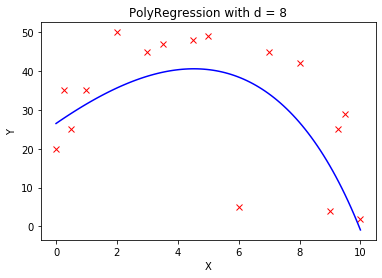

In [12]:
test_polyreg_univariate()